In [1]:
# Split datasets according to first metrics

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk import WordNetLemmatizer
from nltk import word_tokenize
import spicy
import scipy
import seaborn as sns

In [3]:
with open('data/l/train_l.jsonl', 'r') as f:
  a = list(f)

data_l =[]
for element in a:
  data_l.append(json.loads(element))

data_l = pd.DataFrame(data_l)

In [4]:
with open('data/test/test.jsonl', 'r') as f:
  a = list(f)

data_test =[]
for element in a:
  data_test.append(json.loads(element))

data_test = pd.DataFrame(data_test)

In [5]:
data_test

,qID,sentence,option1,option2
0,3QX22DUVOQVY79AVVUY9TVTO8KCVM0-2,Kenneth went cheap on the gemstone present for...,Kenneth,Michael
1,3LOJFQ4BOZTHN4A6JXLZ8WVDJI4DKP-2,There were more holes in the yard of Amy than ...,Amy,Carrie
2,3INZSNUD824X68RFF0UAINHY9KB9D5-2,The dog didn't like its collar but was okay wi...,collar,leash
3,32TMVRKDGPCKS7PCHXN3FNSGBLZ842-2,The door opened louder than the window because...,window,door
4,32TMVRKDGPCKS7PCHXN3FNSGBLZ842-1,The door opened louder than the window because...,window,door
...,...,...,...,...
1762,3YGE63DINABEJK3TWZG7H05PCBI0WF-1,After the break we faxed over the single paper...,paper,document
1763,3BO3NEOQM0FDPDIZFMXLDHKMI5QAIY-2,The man's faith changed after he heard of anot...,science,religion
1764,3YGYP13643NCWKEEYB8Z5DTLSPDNR9-2,The woman had a lot to cope with when her cat ...,cat,dog
1765,3UYRNV2KIVD6EFZIZ22ZEWYH3D78NZ-1,Carrie asked for help caring for her dying erm...,Carrie,Maria


In [6]:
data_l

,qID,sentence,option1,option2,answer
0,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-2,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,2
1,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-1,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,1
2,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-1,"He never comes to my home, but I always go to ...",home,house,1
3,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-2,"He never comes to my home, but I always go to ...",home,house,2
4,3D5G8J4N5CI2K40F4RZLF9OG2CKVTH-2,"Kyle doesn't wear leg warmers to bed, while Lo...",Kyle,Logan,2
...,...,...,...,...,...
10229,391JB9X4Z0MKRYGJWQK2RMI7S79MKF-1,"Paint was applied to the scooter, but not the ...",scooter,car,1
10230,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL-1,Eric was looking through the old temple and fo...,Eric,Matthew,1
10231,3UEBBGULPFMDUVU7KJ8RALJO9KFFUL-2,Eric was looking through the old temple and fo...,Eric,Matthew,2
10232,32L724R85LIKCHO145FI3C9HCFHPIR-2,The dentist did not scold Natalie for not flos...,Natalie,Emily,2


In [7]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm_notebook
import tqdm

In [8]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [9]:
sentence_embeddings_l = model.encode(list(data_l['sentence']))

In [10]:
sentence_embeddings_test = model.encode(list(data_test['sentence']))

In [11]:
list_scores = []
for i in tqdm.notebook.tqdm(range(sentence_embeddings_l.shape[0])):
    list_scores.append(
        cosine_similarity([sentence_embeddings_l[i]],sentence_embeddings_test)[0]
    )

  0%|          | 0/10234 [00:00<?, ?it/s]

In [12]:
scores_l_test = pd.DataFrame(np.transpose(list_scores))

In [13]:
np.mean(scores_l_test[0].sort_values(ascending=False)[:10])

0.8105817

In [14]:
list_scores_l_test = []
for i in tqdm.notebook.tqdm(range(scores_l_test.shape[1])):
    list_scores_l_test.append([i,np.mean(scores_l_test[i].sort_values(ascending=False)[:int((scores_l_test.shape[1])/10)])])

  0%|          | 0/10234 [00:00<?, ?it/s]

In [15]:
list_scores_l_test_fordistrib = [element[1] for element in list_scores_l_test]

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

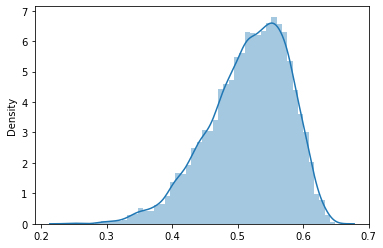

In [16]:
sns.distplot(list_scores_l_test_fordistrib)

In [17]:
a = pd.DataFrame(list_scores_l_test).sort_values(1,ascending=False)
a

,0,1
9757,9757,0.649110
8286,8286,0.645686
124,124,0.643920
3800,3800,0.642880
7596,7596,0.641587
...,...,...
4669,4669,0.256350
9,9,0.253896
8,8,0.252849
7101,7101,0.243335


In [18]:
list_split = [list(a[0][:1023*(i+1)]) for i in range(9)]+[list(a[0][1023*9:])]

In [19]:
for i in tqdm.notebook.tqdm(range(len(list_split))):
    bracket = data_l.iloc[list_split[i]]
    bracket.to_csv(f'data/pre_experiment/splitted_l_sbert_{i}.csv')

  0%|          | 0/10 [00:00<?, ?it/s]

In [15]:
sentence_embeddings_xl = pd.DataFrame(sentence_embeddings_l)
sentence_embeddings_xl.to_csv('data/pre_experiment/sentences_bert_768_encoding_s')

In [16]:
scores_xl = pd.DataFrame(list_scores)
scores_xl.to_csv('data/pre_experiment/similarity_bert_encoding_s.csv')